**Material obtenido del ramo IIC2413 - Bases de Datos, semestre 2018-2, profesor Adrián Soto**
* **\[2019-2\]** Ampliado por Felipe Barrientos y Joaquín Eichholz para el ramo IIC2433 - Minería de datos
* **\[2020-2\]** Ampliado por Sebastian Ricke y Federico Taladriz para el mismo curso.

# Introducción a Minería de Datos: Análisis de datos con Python

En esta ayudantía veremos principalmente las siguientes librerías: 
- **`NumPy`**: Para cálculos numéricos y manejo de matrices. 
- **`Pandas`**: Principalmente manejo de `DataFrames` (tablas).
- **`Matplotlib`**: Plotear y visualizar información. 
- **`SciPy`**: Manejo de funciones aleatorias y matemáticas complejas. 

### Outline

- Introducción a la librería **`NumPy`**:
    - Arrays multidimensionales: `ndarrays`. 
        - Operaciones numéricas
- Introducción a la librería **`Pandas`**:
    - `Series`
        - Operaciones
    - `DataFrames`
        - Preprocesamiento, manejar nulos
        - Selección
        - Importación, exportación
        - Ordenamiento
        - Agregación
        - Combinaciones
        - Creación de `DataFrames``
- Visualización con **`matplotlib`**.
- **`Scipy`**:
    - Muestreo
- Otros ejemplos
- Consejos de eficiencia 

### Requisitos

Vamos a utilizar Python3 y algunas librerías externas. Las vamos a instalar utilizando `pip`:

```
pip3 install --upgrade jupyter matplotlib numpy pandas scipy scikit-learn time seaborn
```

# Numpy

`NumPy` es una librería para hacer cómputos numéricos en Python. Es la base de muchas otras librerías científicas. Entre otras cosas, nos permite:

- Utilizar arreglos multidimensionales.
- Utilizar funciones matemáticas.
- Utilizar herramientas de álgebra lineal.

Necesitamos conocer esta librería (en concreto, el manejo de arreglos) para poder entender el funcionamiento de `pandas`. Para comenzar a trabajar vamos a importar la librería y crear un pequeño arreglo de elementos aleatorios.

In [145]:
import numpy as np

### Arreglos multidimensionales y muestras aleatorias

Con `np.random.rand(n, m)` podemos obtener `n x m` muestras **Uniforme(0,1)** (No confundir con `np.random.randn(n, m)`, con lo que se obtienen muestras Normal(0,1))

In [146]:
data = np.random.rand(2,4)
data

array([[0.67150174, 0.24427207, 0.42537057, 0.43262216],
       [0.16989674, 0.47668403, 0.60330872, 0.96439545]])

Esto nos entrega un objeto `numpy.ndarray`, lo que respresenta un arreglo multidimensional. Este se puede pensar como una matriz, pero potencialemente con **muchas dimensiones**. 

In [147]:
type(data)

numpy.ndarray

Para preguntar el número de dimensiones utilizamos `ndim`. Para preguntar las dimensiones utilizamos `shape`.

In [4]:
data.ndim

2

In [5]:
data.shape

(2, 4)

###  Ponderar por un escalar
A diferencia de una lista, podemos hacer operaciones matriciales, como multiplicar el arreglo `data` por un escalar:

In [148]:
data * 10

array([[6.71501738, 2.44272066, 4.2537057 , 4.32622161],
       [1.69896744, 4.76684034, 6.03308719, 9.64395452]])

In [149]:
np.multiply(data, 10)

array([[6.71501738, 2.44272066, 4.2537057 , 4.32622161],
       [1.69896744, 4.76684034, 6.03308719, 9.64395452]])

### Suma
o sumarle una matriz:

In [150]:
data + data

array([[1.34300348, 0.48854413, 0.85074114, 0.86524432],
       [0.33979349, 0.95336807, 1.20661744, 1.9287909 ]])

### Crear arreglos

Podemos crear arreglos a partir de una lista:

In [151]:
data1 = [1, 2, 3, 5, 9]
arr1 = np.array(data1)
arr1

array([1, 2, 3, 5, 9])

In [10]:
np.append(arr1, 19)

array([ 1,  2,  3,  5,  9, 19])

### Invertir

In [152]:
arr2 = np.random.rand(2,2)
arr2

array([[0.61278857, 0.50507167],
       [0.01181561, 0.90070676]])

In [153]:
np.linalg.inv(arr2)

array([[ 1.64972137, -0.9250819 ],
       [-0.02164129,  1.12237462]])

### Transponer

In [154]:
arr2 = np.random.rand(2,4)
arr2

array([[0.21622633, 0.71310205, 0.30565074, 0.56890384],
       [0.01851054, 0.14225885, 0.0745762 , 0.75372777]])

In [155]:
arr2.T

array([[0.21622633, 0.01851054],
       [0.71310205, 0.14225885],
       [0.30565074, 0.0745762 ],
       [0.56890384, 0.75372777]])

### Accediendo y mutando elementos

Para obtener un elemento:

In [156]:
arr2 = np.random.randn(2,3)
arr2

array([[-0.41614934, -0.14305247,  0.69028445],
       [-1.81835297,  0.28862741,  0.37857699]])

In [157]:
arr2[1][2]

0.3785769867605808

Podemos acceder de esta forma también:

In [158]:
arr2[1, 2]

0.3785769867605808

Los arreglos son mutables:

In [159]:
arr2[1,1] = 300
arr2

array([[-4.16149337e-01, -1.43052473e-01,  6.90284454e-01],
       [-1.81835297e+00,  3.00000000e+02,  3.78576987e-01]])

### Aange

También tenemos un equivalente a `range` llamado `arange`, que genera un numpy array.

In [160]:
np.arange(11)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10])

### Operaciones sobre arreglos

Algunas operaciones que se pueden hacer sobre un arreglo son las siguientes. 

In [161]:
arr = np.array([[1, 2, 3, 4], [5, 6, 7, 8]])
arr

array([[1, 2, 3, 4],
       [5, 6, 7, 8]])

In [162]:
# Elevar al cuadrado (Equivalente a np.power(arr, arr))
arr ** arr

array([[       1,        4,       27,      256],
       [    3125,    46656,   823543, 16777216]])

In [163]:
# Sumar un escalar a cada elemento
arr + 1

array([[2, 3, 4, 5],
       [6, 7, 8, 9]])

In [164]:
# Sumar un escalar a cada elemento y restarse a si mismo
(arr + 4) - arr

array([[4, 4, 4, 4],
       [4, 4, 4, 4]])

In [165]:
1 / arr

array([[1.        , 0.5       , 0.33333333, 0.25      ],
       [0.2       , 0.16666667, 0.14285714, 0.125     ]])

In [166]:
#Aplicar Raiz
arr ** 0.5

array([[1.        , 1.41421356, 1.73205081, 2.        ],
       [2.23606798, 2.44948974, 2.64575131, 2.82842712]])

### _Slices_

Podemos extraer partes de un arreglo tal como en las listas. También podemos usar esto para cambiar los valores de dichos elementos.

In [167]:
arr = np.arange(1,12)
arr

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11])

In [168]:
arr[3:6]

array([4, 5, 6])

In [169]:
arr[3:6] = 0
arr

array([ 1,  2,  3,  0,  0,  0,  7,  8,  9, 10, 11])

### Indexando con booleanos

Podemos utilizar comparaciones booleanas con los arreglos:

In [170]:
arr1 = np.array([0, 0, 1, 1, 2, 2])
arr1

array([0, 0, 1, 1, 2, 2])

In [171]:
arr1 == 1

array([False, False,  True,  True, False, False])

Y usarlo para acceder a valores en otros arreglos. Vamos a crear un arreglo multidimensional e ingresar el arreglo anterior como índice:

In [172]:
arr2 = np.random.randn(6, 4)
arr2

array([[-0.31654277,  0.95369299, -0.82951262,  0.8403211 ],
       [ 0.6056693 ,  0.40465603,  1.71384262,  0.00247962],
       [-0.65505588,  1.15305133,  0.41900582, -0.54408355],
       [-0.69616825, -0.15210318,  0.92101311, -1.33784692],
       [ 0.15496029, -0.36557641, -0.13706702,  0.63454473],
       [-0.21267253,  0.56849057,  0.34666048,  0.82438057]])

In [173]:
#Con esto dejamos solo las filas que se evaluan como true arr1 == 1
arr2[arr1 == 1]

array([[-0.65505588,  1.15305133,  0.41900582, -0.54408355],
       [-0.69616825, -0.15210318,  0.92101311, -1.33784692]])

Y también podemos negar la condición:

In [33]:
arr2[~(arr1 == 1)]

array([[ 0.3574777 ,  0.03562595, -0.1536299 , -0.11887122],
       [-0.43079572,  0.83498375,  0.26821071, -0.11809856],
       [-0.73733585, -0.82176962,  1.43030345,  0.85009682],
       [ 0.32379067, -0.79327236,  0.4146549 ,  1.99369319]])

### Otras funciones estadisticas básicas

Tenemos acceso a algunas funciones de estadística básicas. Por ejemplo `sum`, `mean` y `std` nos permiten respectivamente sacar la suma, el promedio y la desviación estándar de un arreglo.

In [174]:
arr = np.random.randn(10000)
arr

array([ 0.50868591,  0.88570712, -0.67273371, ..., -0.87475848,
       -0.7721397 , -0.53749669])

In [175]:
arr.sum()

-98.58894404850608

In [176]:
arr.mean()

-0.009858894404850608

In [177]:
arr.std()

0.9961543225784399

También podemos ordenar:

In [178]:
arr.sort()
arr

array([-3.38542329, -3.37566848, -3.35624164, ...,  3.41551893,
        3.45694959,  3.55861048])

Y pedir elementos distintos: (set)

In [179]:
arr = np.array([0, 0, 1, 1, 2, 2])
np.unique(arr)

array([0, 1, 2])

# Pandas

Partimos importando la librería:

In [181]:
import pandas as pd

**Resumen de funciones de pandas:** https://www.dataquest.io/blog/pandas-cheat-sheet/

## Series

Vamos a partir instanciando objetos de tipo `Series`. Estos objetos representan **arreglos unidimensionales**. Son como una lista de Python, pero con muchos mas métodos.

Para ilustrar, pensemos que tenemos un objeto `Series` con las notas de un curso:

In [182]:
grades = pd.Series([5.4, 1.1, 7.0, 3.9, 4.4, 3.5, 6.4, 6.2])
grades

0    5.4
1    1.1
2    7.0
3    3.9
4    4.4
5    3.5
6    6.4
7    6.2
dtype: float64

In [183]:
grades.describe()

count    8.000000
mean     4.737500
std      1.928684
min      1.100000
25%      3.800000
50%      4.900000
75%      6.250000
max      7.000000
dtype: float64

Para un objeto de tipo `Series` podemos agregar un label a sus índices.

In [184]:
grades.index = ['Alice', 'Bob', 'Charles', 'Dino', 'James', 'Lily', 'Ella', 'Evelyn']
grades

Alice      5.4
Bob        1.1
Charles    7.0
Dino       3.9
James      4.4
Lily       3.5
Ella       6.4
Evelyn     6.2
dtype: float64

In [185]:
grades['Dino']

3.9

(**F** por Dino)

Podemos seleccionar varios elementos según el label de su índice.

In [186]:
grades[['Bob', 'James']]

Bob      1.1
James    4.4
dtype: float64

In [187]:
grades >=4

Alice       True
Bob        False
Charles     True
Dino       False
James       True
Lily       False
Ella        True
Evelyn      True
dtype: bool

Podemos hacer filtros pasando un arreglo de _booleanos_:

In [188]:
grades[grades >= 4]

Alice      5.4
Charles    7.0
James      4.4
Ella       6.4
Evelyn     6.2
dtype: float64

Una método rápido para ver la distribución de un objeto `Series` es `hist`, lo que entrega su histograma. Para visualizaciones mas avanzadas veremos **matplotlib** mas adelante.

<AxesSubplot:>

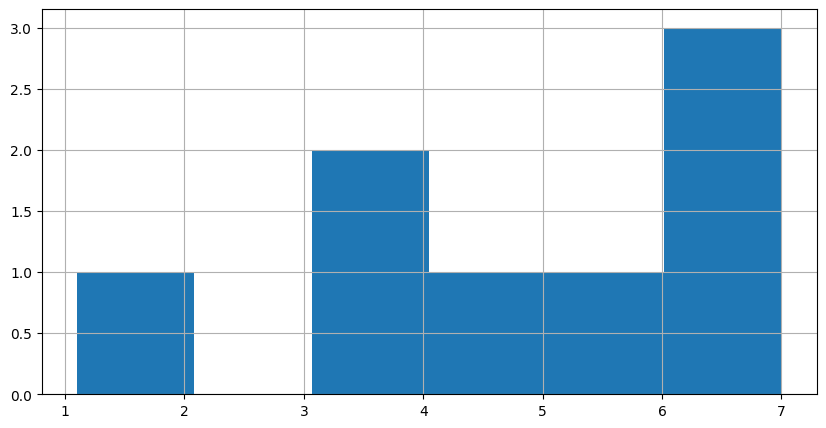

In [189]:
grades.hist(bins=6)

Finalmente, podemos crear un objeto `Series` a partir de un diccionario. Supongamos el siguiente diccionario de personas junto a su edad.

In [190]:
people = {'Alice': 20, 'Bob': 17, 'Charles': 23, 'Dino': 50}
people_series = pd.Series(people)
people_series

Alice      20
Bob        17
Charles    23
Dino       50
dtype: int64

### Aplicando una función a todos los datos

Si quisieramos aplicar una función de python a todos los datos:

In [191]:
def todos_pasan(nota):
    return max(nota, 4)

In [57]:
todos_pasan(grades)

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

Esto no funciona. En cambio, utilizamos `apply`:

In [192]:
grades.apply(todos_pasan)

Alice      5.4
Bob        4.0
Charles    7.0
Dino       4.0
James      4.4
Lily       4.0
Ella       6.4
Evelyn     6.2
dtype: float64

## DataFrame

Un objeto de tipo `DataFrame` representa una tabla. Este trae múltiples métodos para el facil manejo de grandes datasets.

En `pandas` es posible importar datos en formato `.csv`, `.xlsx` entre otros. En este caso, importaremos `comunas.csv`, un dataset con distintos datos de todas las comunas de Chile. **Es necesario tener alojado este archivo en el mismo directorio donde se encuentra este archivo `.ipynb`.**

In [193]:
df = pd.read_csv("comunas.csv")
df

,Unnamed: 0,cod,nombre,provincia,region,superficie,poblacion,idh
0,0,15101,Arica,Arica,Arica y Parinacota,4799.4,210936,0.384
1,1,15102,Camarones,Arica,Arica y Parinacota,3927.0,679,0.751
2,2,15201,Putre,Parinacota,Arica y Parinacota,5902.5,1462,0.707
3,3,15202,General Lagos,Parinacota,Arica y Parinacota,2244.4,739,0.670
4,4,1101,Iquique,Iquique,Tarapacá,2242.1,184953,0.766
...,...,...,...,...,...,...,...,...
341,341,13601,Talagante,Talagante,Metropolitana de Santiago,126.0,78887,0.749
342,342,13602,El Monte,Talagante,Metropolitana de Santiago,118.0,32468,0.688
343,343,13603,Isla de Maipo,Talagante,Metropolitana de Santiago,189.0,33723,0.724
344,344,13604,Padre Hurtado,Talagante,Metropolitana de Santiago,80.8,50696,0.728


Primero que todo, vamos a **limpiar** un poco los datos. Vamos a eliminar las columnas `Unnamed: 0` y `cod`. Lo hacemos con `drop`:

In [194]:
df = df.drop(['Unnamed: 0', 'cod'], axis=1)
df

,nombre,provincia,region,superficie,poblacion,idh
0,Arica,Arica,Arica y Parinacota,4799.4,210936,0.384
1,Camarones,Arica,Arica y Parinacota,3927.0,679,0.751
2,Putre,Parinacota,Arica y Parinacota,5902.5,1462,0.707
3,General Lagos,Parinacota,Arica y Parinacota,2244.4,739,0.670
4,Iquique,Iquique,Tarapacá,2242.1,184953,0.766
...,...,...,...,...,...,...
341,Talagante,Talagante,Metropolitana de Santiago,126.0,78887,0.749
342,El Monte,Talagante,Metropolitana de Santiago,118.0,32468,0.688
343,Isla de Maipo,Talagante,Metropolitana de Santiago,189.0,33723,0.724
344,Padre Hurtado,Talagante,Metropolitana de Santiago,80.8,50696,0.728


También pondremos como index la columna `nombre`:

In [195]:
df = df.set_index('nombre') #Esto también puede hacerse así: df.index = df['nombre']
df.head()

,provincia,region,superficie,poblacion,idh
nombre,,,,,
Arica,Arica,Arica y Parinacota,4799.4,210936,0.384
Camarones,Arica,Arica y Parinacota,3927.0,679,0.751
Putre,Parinacota,Arica y Parinacota,5902.5,1462,0.707
General Lagos,Parinacota,Arica y Parinacota,2244.4,739,0.670
Iquique,Iquique,Tarapacá,2242.1,184953,0.766


Si queremos una **descripción rápida** de los datos:

In [196]:
df.describe()

,superficie,poblacion,idh
count,3.460000e+02,346.000000,341.000000
mean,5.815967e+03,50407.078035,0.686968
std,6.727407e+04,86926.943488,0.062951
min,7.000000e+00,127.000000,0.384000
25%,2.513000e+02,9148.500000,0.647000
50%,6.331500e+02,17688.000000,0.679000
75%,1.657500e+03,50747.000000,0.723000
max,1.250258e+06,805000.000000,0.949000


En esta tabla tenemos **valores nulos**. Vamos a buscarlos:

In [197]:
df[df.isnull().any(axis=1)]

,provincia,region,superficie,poblacion,idh
nombre,,,,,
Alto Hospicio,Iquique,Tarapacá,572.9,94455,NaN
Hualpén,Concepción,Biobío,53.5,86176,NaN
Alto Biobío,Biobío,Biobío,2124.6,10039,NaN
Cholchol,Cautín,La Araucanía,427.9,10825,NaN
Antártica,Antártica Chilena,Magallanes y Antártica Chilena,1250257.6,127,NaN


`pandas` tiene métodos auxiliares para lidiar con datos faltantes. Uno es **eliminar** aquellas filas con la función `dropna()`

In [198]:
df_cleaned = df.dropna()
df_cleaned

,provincia,region,superficie,poblacion,idh
nombre,,,,,
Arica,Arica,Arica y Parinacota,4799.4,210936,0.384
Camarones,Arica,Arica y Parinacota,3927.0,679,0.751
Putre,Parinacota,Arica y Parinacota,5902.5,1462,0.707
General Lagos,Parinacota,Arica y Parinacota,2244.4,739,0.670
Iquique,Iquique,Tarapacá,2242.1,184953,0.766
...,...,...,...,...,...
Talagante,Talagante,Metropolitana de Santiago,126.0,78887,0.749
El Monte,Talagante,Metropolitana de Santiago,118.0,32468,0.688
Isla de Maipo,Talagante,Metropolitana de Santiago,189.0,33723,0.724


O podemos tomar una opción menos radical, que es **reemplazar** los nulos por un valor en particular. En este caso, reemplazaremos por la media:

In [199]:
df = df.fillna(df['idh'].mean())
df

,provincia,region,superficie,poblacion,idh
nombre,,,,,
Arica,Arica,Arica y Parinacota,4799.4,210936,0.384
Camarones,Arica,Arica y Parinacota,3927.0,679,0.751
Putre,Parinacota,Arica y Parinacota,5902.5,1462,0.707
General Lagos,Parinacota,Arica y Parinacota,2244.4,739,0.670
Iquique,Iquique,Tarapacá,2242.1,184953,0.766
...,...,...,...,...,...
Talagante,Talagante,Metropolitana de Santiago,126.0,78887,0.749
El Monte,Talagante,Metropolitana de Santiago,118.0,32468,0.688
Isla de Maipo,Talagante,Metropolitana de Santiago,189.0,33723,0.724


Vemos que el dato que estaba como `Nan` ahora se cambió por el valor promedio.

Existen muchas otras opciones para limpiar los datos, te invitamos a revisarlas en el la documentación!

## Operaciones sobre DataFrames

Existen muchas operaciones aplicables sobre un `DataFrame`. Aquí veremos algunas. 

### Selección

- Para obtener una columna como `Series`:

In [200]:
df['provincia']

nombre
Arica                 Arica
Camarones             Arica
Putre            Parinacota
General Lagos    Parinacota
Iquique             Iquique
                    ...    
Talagante         Talagante
El Monte          Talagante
Isla de Maipo     Talagante
Padre Hurtado     Talagante
Peñaflor          Talagante
Name: provincia, Length: 346, dtype: object

- Para obtener un nuevo df con **solo algunas de las columnas**:

In [201]:
df[['superficie', 'poblacion']]

,superficie,poblacion
nombre,,
Arica,4799.4,210936
Camarones,3927.0,679
Putre,5902.5,1462
General Lagos,2244.4,739
Iquique,2242.1,184953
...,...,...
Talagante,126.0,78887
El Monte,118.0,32468
Isla de Maipo,189.0,33723


- Para obtener alguna **fila por su índice** (Recordemos que mas arriba ejecutamos `df.set_index('nombre')`)

In [202]:
df.loc['Hualpén']

provincia     Concepción
region            Biobío
superficie          53.5
poblacion          86176
idh             0.686968
Name: Hualpén, dtype: object

- La otra forma de buscar una **fila** es **por su posición** dentro del df, mediante `iloc`:

In [204]:
df.iloc[3] #Equivalente a df.iloc[3, :]

provincia             Parinacota
region        Arica y Parinacota
superficie                2244.4
poblacion                    739
idh                         0.67
Name: General Lagos, dtype: object

U obtener **un elemento** de una fila:

In [556]:
df.iloc[3,3]

739

O incluso un **slice**:

In [205]:
df.iloc[2:5,:]

,provincia,region,superficie,poblacion,idh
nombre,,,,,
Putre,Parinacota,Arica y Parinacota,5902.5,1462,0.707
General Lagos,Parinacota,Arica y Parinacota,2244.4,739,0.670
Iquique,Iquique,Tarapacá,2242.1,184953,0.766


Al igual que los numpy arrays, podemos **seleccionar una o múltiples filas mediante filtros**. Aquí hay algunos ejemplos:

- Obtengamos las comunas con una población menor a 500 peronas:

In [206]:
df[df['poblacion']<500]

,provincia,region,superficie,poblacion,idh
nombre,,,,,
Ollagüe,El Loa,Antofagasta,2964.0,332,0.679000
Río Verde,Magallanes,Magallanes y Antártica Chilena,17248.0,363,0.784000
Antártica,Antártica Chilena,Magallanes y Antártica Chilena,1250257.6,127,0.686968


- Comunas con una población mayor a 200.000 y un IDH menor a 0.7. Para esto, ocupamos el operador **`&` para hacer un `AND`**:

In [207]:
df[(df['poblacion'] > 200000) & (df['idh'] < 0.7)]

,provincia,region,superficie,poblacion,idh
nombre,,,,,
Arica,Arica,Arica y Parinacota,4799.4,210936,0.384
La Pintana,Santiago,Metropolitana de Santiago,30.6,202146,0.679


- Comunas con una superficie menor a 10 km^2 o mayor a 30.000 km^2. Para esto, ocupamos **`|` para hacer un `OR`**:

In [208]:
df[(df['superficie'] < 10) | (df['superficie'] > 30000)]

,provincia,region,superficie,poblacion,idh
nombre,,,,,
Antofagasta,Antofagasta,Antofagasta,30718.10,348669,0.734000
Putaendo,San Felipe de Aconcagua,Valparaíso,7.68,17369,0.674000
Antártica,Antártica Chilena,Magallanes y Antártica Chilena,1250257.60,127,0.686968
Natales,Última Esperanza,Magallanes y Antártica Chilena,49924.10,21327,0.699000
Independencia,Santiago,Metropolitana de Santiago,7.00,73874,0.709000
Lo Espejo,Santiago,Metropolitana de Santiago,7.00,99527,0.657000
Lo Prado,Santiago,Metropolitana de Santiago,7.00,94766,0.715000
San Joaquín,Santiago,Metropolitana de Santiago,9.70,94255,0.719000
San Ramón,Santiago,Metropolitana de Santiago,7.00,85195,0.679000


### Importación/Exportación

Como se dijo mas arriba, se puede **importar** archivos de distintos tipos. Por ejemplo, están los siguientes métodos:
- `pd.read_csv(filename)`
- `pd.read_excel(filename)`
- `pd.read_sql(query, connection_object)`

Los que entregan un objeto DataFrame. Para **exportar**, se usan los siguientes:
- `df.to_csv(filename)`
- `df.to_excel(filename)`
- `df.to_sql(table_name, connection_object)`
- `df.to_json(filename)``


Por ejemplo, para exportar en un `csv` el df que limpiamos recién, podemos hacerlo de esta forma: 

In [209]:
df.to_csv('df_cleaned.csv')

### Ordenamiento

In [210]:
df.sort_values(by=['poblacion'], ascending=True)

,provincia,region,superficie,poblacion,idh
nombre,,,,,
Antártica,Antártica Chilena,Magallanes y Antártica Chilena,1250257.6,127,0.686968
Ollagüe,El Loa,Antofagasta,2964.0,332,0.679000
Río Verde,Magallanes,Magallanes y Antártica Chilena,17248.0,363,0.784000
Tortel,Capitán Prat,Aysén del Gral. C. Ibáñez del Campo,19710.6,531,0.655000
Laguna Blanca,Magallanes,Magallanes y Antártica Chilena,3695.6,631,0.785000
...,...,...,...,...,...
Viña del Mar,Valparaíso,Valparaíso,121.6,311399,0.766000
Antofagasta,Antofagasta,Antofagasta,30718.1,348669,0.734000
La Florida,Santiago,Metropolitana de Santiago,70.2,397497,0.804000


Si necesitamos ordenar por más de una columna, podemos pasar un arreglo al argumento `by`. La prioridad de orden será la que especifiquemos en ese arreglo. 

Recordemos que al hacer `df['col']` **obtenemos un objeto `Series`**. Algunos comandos útiles que incluyen ordenamiento de estos objetos son los siguientes:
- `s.nlargest(n)`: Obtener los **n mayores** valores de la serie `s`.
- `s.nsmallest(n)`: Obtener los **n menores** valores de la serie `s`.

Por ejemplo, para obtener las 3 comunas con menor superficie, hacemos lo siguiente:

In [211]:
df['poblacion'].nsmallest(3)

nombre
Antártica    127
Ollagüe      332
Río Verde    363
Name: poblacion, dtype: int64

O mas directamente, para obtener los índices de los valores máximos y mínimos:
- `s.idxmax()`: Obtener el **índice del valor máximo** de la serie `s`.
- `s.idxmin()`: Obtener el **índice del valor mínimo** de la serie `s`.

In [564]:
df['poblacion'].idxmin()

'Antártica'

### Agregación

Veremos dos ejemplos para ilustrar esto.

 - **Densidad poblacional de cada región**. Para esto, agrupamos por región con `groupby`, sumamos los elementos de cada grupo y dividimos la columna `poblacion` sobre la columna `superficie`.

In [77]:
regiones = df.groupby(df['region']).sum() 
regiones['poblacion']/regiones['superficie'] # Ojo! esto retorna un objeto Series

region
Antofagasta                              4.376297
Arica y Parinacota                      12.671854
Atacama                                  3.904089
Aysén del Gral. C. Ibáñez del Campo      0.994822
Biobío                                  65.543152
Coquimbo                                17.449216
La Araucanía                            29.317512
Lib. Gral. Bernardo O'Higgins           54.467326
Los Lagos                               17.204039
Los Ríos                                20.488007
Magallanes y Antártica Chilena           0.114036
Maule                                   35.386433
Metropolitana de Santiago              456.073841
Tarapacá                                 7.108576
Valparaíso                             147.024421
Ñuble                                   34.917176
dtype: float64

- **Número de comunas por nivel de desarrollo**. Según organismos internaciones, se definen los siguientes niveles de desarrollo:
    - Muy alto: idh > 0.8
    - Alto: 0.8 > idh >= 0.7
    - Medio: 0.7 > idh >= 0.55
    - Bajo: idh < 0.55
    
Por lo tanto, creamos una nueva columna con esta clasificación:

In [212]:
df.loc[df['idh'] > 0.8, 'nivel_idh'] = 'muy alto'
df.loc[(df['idh'] < 0.8) & (df['idh'] >= 0.7), 'nivel_idh'] = 'alto'
df.loc[(df['idh'] < 0.7) & (df['idh'] >= 0.55), 'nivel_idh'] = 'medio'
df.loc[df['idh'] < 0.55, 'nivel_idh'] = 'bajo'

In [213]:
df

,provincia,region,superficie,poblacion,idh,nivel_idh
nombre,,,,,,
Arica,Arica,Arica y Parinacota,4799.4,210936,0.384,bajo
Camarones,Arica,Arica y Parinacota,3927.0,679,0.751,alto
Putre,Parinacota,Arica y Parinacota,5902.5,1462,0.707,alto
General Lagos,Parinacota,Arica y Parinacota,2244.4,739,0.670,medio
Iquique,Iquique,Tarapacá,2242.1,184953,0.766,alto
...,...,...,...,...,...,...
Talagante,Talagante,Metropolitana de Santiago,126.0,78887,0.749,alto
El Monte,Talagante,Metropolitana de Santiago,118.0,32468,0.688,medio
Isla de Maipo,Talagante,Metropolitana de Santiago,189.0,33723,0.724,alto


Con esto, agrupamos por nivel de desarrollo y vemos el tamaño de cada grupo:

In [214]:
df.groupby(df['nivel_idh']).size() # Ojo! esto retorna un objeto Series

nivel_idh
alto        119
bajo          2
medio       212
muy alto     13
dtype: int64

**Propuesto**: Otra función de `pandas` que clasifica objetos tipo `Series` de acuerdo a intervalos es `pd.cut`. Te animamos a hacer este mismo ejercicio con esta función. 

Un método mas simple que también hace un conteo de grupos de acuerdo a alguna columna (un objeto `Series`), es `value_counts`, que nos entrega el conteo ordenado por grupo:

In [216]:
df['nivel_idh'].value_counts()

medio       212
alto        119
muy alto     13
bajo          2
Name: nivel_idh, dtype: int64

### Combinaciones de Dataframes
Existen mútiples formas de combinar `DataFrames`. Aqui veremos algunas.
- `df1.append(df2)` : **Agrega filas** de df2 al final de df1. Columnas deben ser las mismas. 

Tomemos algunas filas del df y volvamos a unirlas:

In [570]:
df1 = df.iloc[2:5]
df1

,provincia,region,superficie,poblacion,idh,nivel_idh
nombre,,,,,,
Putre,Parinacota,Arica y Parinacota,5902.5,1462,0.707,alto
General Lagos,Parinacota,Arica y Parinacota,2244.4,739,0.670,medio
Iquique,Iquique,Tarapacá,2242.1,184953,0.766,alto


In [571]:
df2 = df.iloc[8:12]
df2

,provincia,region,superficie,poblacion,idh,nivel_idh
nombre,,,,,,
Colchane,Tamarugal,Tarapacá,4015.6,1384,0.603,medio
Huara,Tamarugal,Tarapacá,10474.6,2360,0.676,medio
Pica,Tamarugal,Tarapacá,8934.3,4194,0.793,alto
Antofagasta,Antofagasta,Antofagasta,30718.1,348669,0.734,alto


In [572]:
df1.append(df2)

,provincia,region,superficie,poblacion,idh,nivel_idh
nombre,,,,,,
Putre,Parinacota,Arica y Parinacota,5902.5,1462,0.707,alto
General Lagos,Parinacota,Arica y Parinacota,2244.4,739,0.670,medio
Iquique,Iquique,Tarapacá,2242.1,184953,0.766,alto
Colchane,Tamarugal,Tarapacá,4015.6,1384,0.603,medio
Huara,Tamarugal,Tarapacá,10474.6,2360,0.676,medio
Pica,Tamarugal,Tarapacá,8934.3,4194,0.793,alto
Antofagasta,Antofagasta,Antofagasta,30718.1,348669,0.734,alto


- `pd.concat([df1, df2], axis=1)` : **Agrega columnas** de df1 al final de df2 (a la derecha). Filas deben ser las mismas.  

Tomemos algunas columnas del df de comunas y volvamos a unirlas:

In [217]:
df1 = df[['provincia', 'region']]
df1

,provincia,region
nombre,,
Arica,Arica,Arica y Parinacota
Camarones,Arica,Arica y Parinacota
Putre,Parinacota,Arica y Parinacota
General Lagos,Parinacota,Arica y Parinacota
Iquique,Iquique,Tarapacá
...,...,...
Talagante,Talagante,Metropolitana de Santiago
El Monte,Talagante,Metropolitana de Santiago
Isla de Maipo,Talagante,Metropolitana de Santiago


In [218]:
df2 = df[['idh', 'superficie']]
df2

,idh,superficie
nombre,,
Arica,0.384,4799.4
Camarones,0.751,3927.0
Putre,0.707,5902.5
General Lagos,0.670,2244.4
Iquique,0.766,2242.1
...,...,...
Talagante,0.749,126.0
El Monte,0.688,118.0
Isla de Maipo,0.724,189.0


In [219]:
pd.concat([df1, df2], axis=1)

,provincia,region,idh,superficie
nombre,,,,
Arica,Arica,Arica y Parinacota,0.384,4799.4
Camarones,Arica,Arica y Parinacota,0.751,3927.0
Putre,Parinacota,Arica y Parinacota,0.707,5902.5
General Lagos,Parinacota,Arica y Parinacota,0.670,2244.4
Iquique,Iquique,Tarapacá,0.766,2242.1
...,...,...,...,...
Talagante,Talagante,Metropolitana de Santiago,0.749,126.0
El Monte,Talagante,Metropolitana de Santiago,0.688,118.0
Isla de Maipo,Talagante,Metropolitana de Santiago,0.724,189.0


- `pd.merge(df1, df2)` : Hace un **merge** entre df1 y df2. 

Para ilustrar `merge`, veremos un ejemplo. Se tienen dos `DataFrames`:
* **df1**: Con el nombre de personas y un identificador del vehículo del que son dueños. 
* **df2**: Con el identificador del vehículo y el modelo de este. 
Queremos hacer _join_ sobre el identificador del vehículo, para saber que auto tiene cada persona.

In [221]:
df1 = pd.DataFrame({'name': ['Alice', 'Bob', 'Dino', 'Emma', 'Fabio'],
                    'vhc_id': [1, 2, 2, 1, 3]})

df2 = pd.DataFrame({'vhc_id': [1, 2],
                    'vhc_name': ['Toyota Yaris', 'Kia Rio']})

In [222]:
df1

,name,vhc_id
0,Alice,1
1,Bob,2
2,Dino,2
3,Emma,1
4,Fabio,3


In [578]:
df2

,vhc_id,vhc_name
0,1,Toyota Yaris
1,2,Kia Rio


In [579]:
pd.merge(df1, df2)

,name,vhc_id,vhc_name
0,Alice,1,Toyota Yaris
1,Emma,1,Toyota Yaris
2,Bob,2,Kia Rio
3,Dino,2,Kia Rio


En la operación anterior, omitimos indicar explícitamente el atributo sobre el que estamos haciendo join. Para indicarlo hacemos lo siguiente:

In [580]:
pd.merge(df1, df2, on='vhc_id')

,name,vhc_id,vhc_name
0,Alice,1,Toyota Yaris
1,Emma,1,Toyota Yaris
2,Bob,2,Kia Rio
3,Dino,2,Kia Rio


En el caso de que los atributos intermedios tengan **nombres distintos**:

In [581]:
df1 = pd.DataFrame({'name': ['Alice', 'Bob', 'Dino', 'Emma', 'Fabio'],
                    'id_vehicle': [1, 2, 2, 1, 3]})

df2 = pd.DataFrame({'vhc_id': [1, 2],
                    'vhc_name': ['Toyota Yaris', 'Kia Rio']})

pd.merge(df1, df2, left_on='id_vehicle', right_on='vhc_id')

,name,id_vehicle,vhc_id,vhc_name
0,Alice,1,1,Toyota Yaris
1,Emma,1,1,Toyota Yaris
2,Bob,2,2,Kia Rio
3,Dino,2,2,Kia Rio


En el caso de necesitar un _Outer Join_, podemos indicarlo con el argumento `how`. Puede ser `'left'`, `'right'` o `'outer'`. Veamos un ejemplo de _Left Outer Join_:

In [582]:
pd.merge(df1, df2, left_on='id_vehicle', right_on='vhc_id', how='left')

,name,id_vehicle,vhc_id,vhc_name
0,Alice,1,1.0,Toyota Yaris
1,Bob,2,2.0,Kia Rio
2,Dino,2,2.0,Kia Rio
3,Emma,1,1.0,Toyota Yaris
4,Fabio,3,NaN,NaN


En el caso de querer un _join_ por más de un argumento, puedo indicar una lista de atributos. También puedes renombrar atributos en el caso de que su nombre sea igual en ambos Data Frame y no quieras generar conflictos. Esto lo puedes hacer mediante el argumento `suffixes`. Para ver más puedes consultar la documentación.

Finalmente,si queremos hacer un _join_ **utilizando uno de los índices**:

In [583]:
df1 = pd.DataFrame({'nombre': ['Maca', 'Maria', 'Martin', 'Seba', 'Coni'],
                    'vhc_id': [1, 2, 2, 1, 3]})

df2 = pd.DataFrame({'marca': ['Ford', 'Hyundai']}, index=[1, 2])

In [584]:
df1

,nombre,vhc_id
0,Maca,1
1,Maria,2
2,Martin,2
3,Seba,1
4,Coni,3


In [585]:
#El índice de este df representa el id del vehículo
df2

,marca
1,Ford
2,Hyundai


In [586]:
pd.merge(df1, df2, left_on='vhc_id', right_index=True)

,nombre,vhc_id,marca
0,Maca,1,Ford
3,Seba,1,Ford
1,Maria,2,Hyundai
2,Martin,2,Hyundai


### Creación de DataFrames

Existen varias maneras de crear dataframes. Una de ellas es entregandole un diccionario al contructor de Pandas:

In [223]:
reg_chile = {'name': ['Metropolitana', 'Valparaiso', 'Biobío', 'Maule', 'Araucanía', 'O\'Higgins'],
             'pop': [7112808, 1815902, 1538194, 1044950, 957224, 914555],
             'pib': [24850, 14510, 13281, 12695, 11064, 14840]}
df_new = pd.DataFrame(reg_chile)
df_new

,name,pop,pib
0,Metropolitana,7112808,24850
1,Valparaiso,1815902,14510
2,Biobío,1538194,13281
3,Maule,1044950,12695
4,Araucanía,957224,11064
5,O'Higgins,914555,14840


## Solución consultas actividad 1

### Consulta 1

Obtener los 10 mejores computadores según el orden de cada una de las puntuaciones vs precio (gaming/precio, movilidad/precio, aplicaciones/precio):

(Se piden 3 listas de 10 computadores, una lista ordenada por cada puntuación/precio)

#### Consulta 2: 

Para cada tarjeta gráfica integrada, calcula el valor promedio de los notebooks que la tienen incorporada.

#### Consulta 3: 

Determinar la cantidad de notebooks con procesador marca ```Intel``` y la cantidad con procesadores ```AMD```. Además, obtener el valor promedio de las puntuaciones (aplicaciones, gaming, movilidad) para cada marca. 

# Matplotlib

Una de las ventajas de trabajar con `pandas` es que tenemos acceso rápido a herramientas de visualización. Una de ellas es la librería `matplotlib`. Vamos a ver un ejemplo rápido, haciendo un gráfico de barras de los habitantes por región.

In [224]:
import matplotlib.pyplot as plt

## Histograma

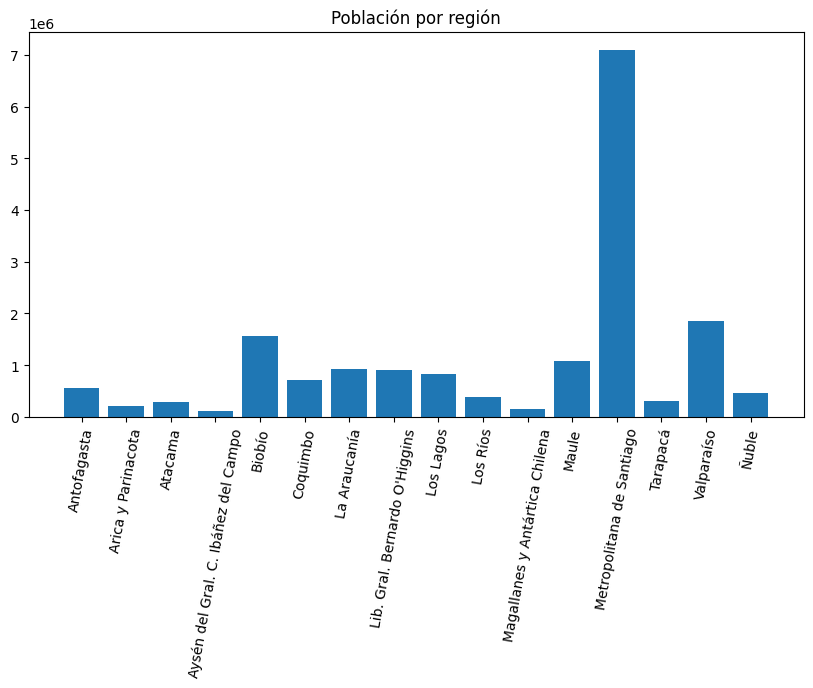

In [225]:
#Datos
pop_by_comune = df['poblacion'].groupby(df['region']).sum()
plt.bar(pop_by_comune.keys(), pop_by_comune)

#Diseño del gráfico
plt.rcParams['figure.figsize'] = [10, 5] #Tamaño gráfico
plt.title('Población por región')
plt.xticks(rotation=80) #Rotación labels

plt.show()

## Scatter plot

Veremos si existe alguna correlación entre densidad poblacional e IDH. 

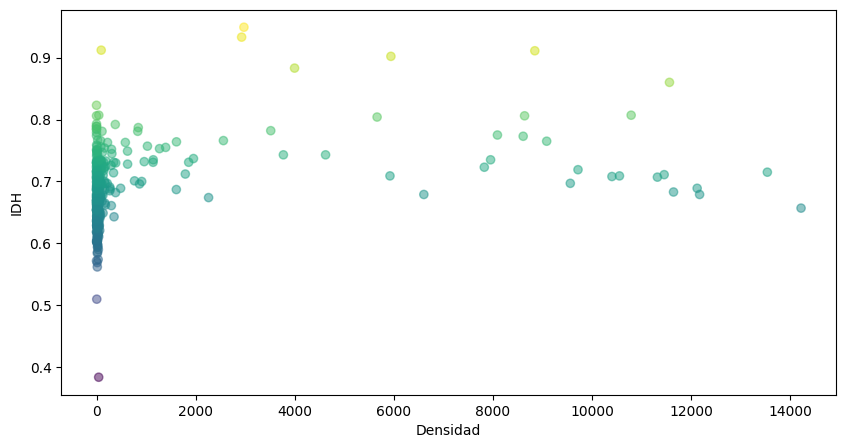

In [82]:
plt.scatter(df['poblacion']/df['superficie'], df['idh'], c=df['idh'], alpha=0.5)
plt.xlabel("Densidad")
plt.ylabel("IDH")
plt.show()

A veces es necesario hacer alguna **transformación** a los datos para una mejor visualización:

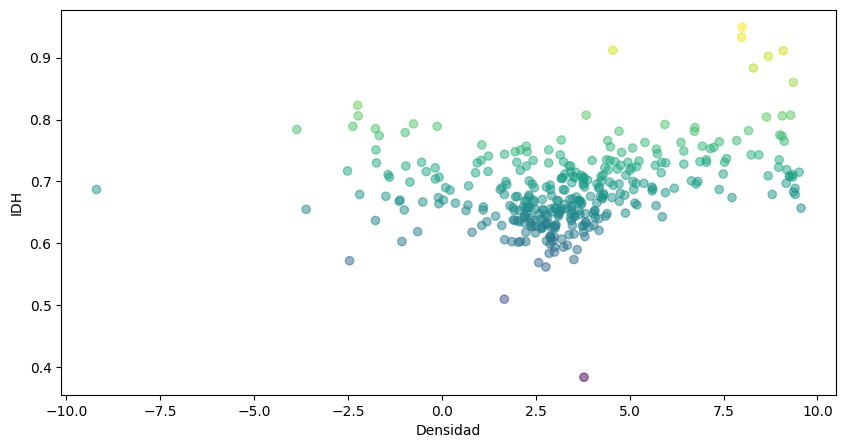

In [83]:
plt.scatter(np.log(df['poblacion']/df['superficie']), df['idh'], c=df['idh'], alpha=0.5)
plt.xlabel("Densidad")
plt.ylabel("IDH")
plt.show()

# Scipy

`Scipy` es una librería complementaria a `numpy`, la cual contiene una serie de algoritmos matemáticos para manipular y visualizar datos. Sus principales utilidades son: 

    - Optimización
    - Manejo de distribuciones de probabilidad 
    - Algoritmos de clustering
    - Solvers de cálculo

In [95]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import scipy.stats as stt

### Muestras normales

In [226]:
data = stt.norm.rvs(loc=0, scale=1, size=10000, random_state=None)
data

array([ 0.33300246,  1.02119586,  2.09097612, ..., -2.73245667,
       -1.13652967, -1.20867674])

Con la ayuda de la librería `matplotlib` podemos ratificar que los datos son normales haciéndo un histograma

(array([  1.,   0.,   0.,   0.,   0.,   1.,   1.,   1.,   0.,   2.,   3.,
          6.,  12.,  13.,  18.,  29.,  22.,  50.,  58.,  76., 111., 128.,
        147., 175., 203., 253., 273., 296., 375., 390., 452., 438., 476.,
        470., 526., 509., 474., 432., 454., 401., 411., 345., 334., 266.,
        263., 210., 173., 150., 147.,  93.,  79.,  66.,  57.,  36.,  32.,
         17.,   8.,  11.,   9.,   5.,   4.,   2.,   2.,   2.,   2.]),
 array([-4.37429555e+00, -4.24937346e+00, -4.12445137e+00, -3.99952927e+00,
        -3.87460718e+00, -3.74968509e+00, -3.62476300e+00, -3.49984091e+00,
        -3.37491882e+00, -3.24999672e+00, -3.12507463e+00, -3.00015254e+00,
        -2.87523045e+00, -2.75030836e+00, -2.62538627e+00, -2.50046418e+00,
        -2.37554208e+00, -2.25061999e+00, -2.12569790e+00, -2.00077581e+00,
        -1.87585372e+00, -1.75093163e+00, -1.62600953e+00, -1.50108744e+00,
        -1.37616535e+00, -1.25124326e+00, -1.12632117e+00, -1.00139908e+00,
        -8.76476985e-01, -7.

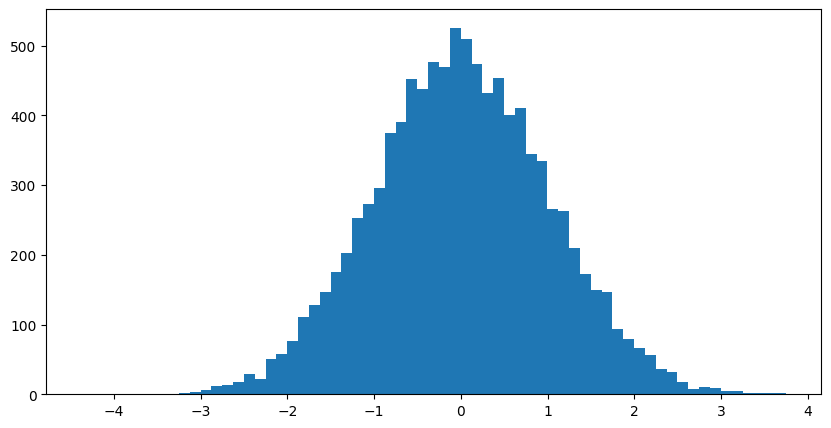

In [227]:
plt.hist(data, histtype='stepfilled', alpha=1, bins = "auto")

### Muestras exponenciales

Primero generamos una muestra aleatoria de 10000 datos extraidos de una distribución exponencial:

In [98]:
data = stt.expon.rvs(scale=2, size=10000, random_state=None)
data

array([0.68019686, 0.2118314 , 0.20035208, ..., 0.10904282, 3.08077931,
       0.79543739])

Generaremos una secuencia de 10000 números con `linspace`. Esto lo usamos para graficar punto a punto la PDF. 

In [99]:
x = np.linspace(start=0, stop=15, num=10000)
x

array([0.00000000e+00, 1.50015002e-03, 3.00030003e-03, ...,
       1.49969997e+01, 1.49984998e+01, 1.50000000e+01])

La función `fit` permite **estimar los parámetros** que ajustan mejor a la distribución de los datos.

Scale estimado: 1.9862689048796083


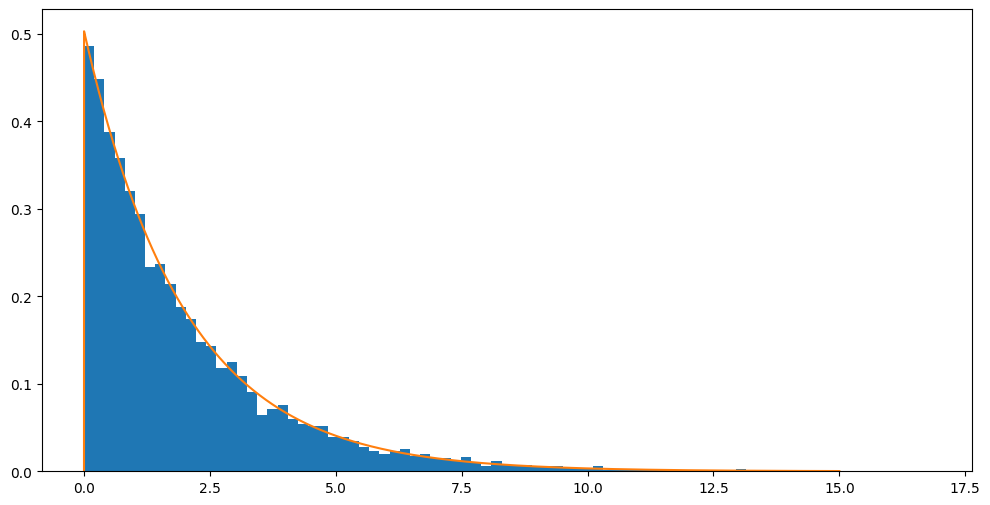

In [100]:
plt.figure(figsize=(12,6))
plt.hist(data, density=True, histtype='stepfilled', alpha=1, bins = "auto")

loc_estimado, scale_estimado = stt.expon.fit(data)
print(f"Scale estimado: {scale_estimado}")
exponential = stt.expon(loc_estimado, scale_estimado).pdf(x)

plt.plot(x, exponential, label='exp')

Otra librería muy útil para hacer visualizaciones es `seaborn`. Esta herramienta permite hacer gráficos más estilizados. 

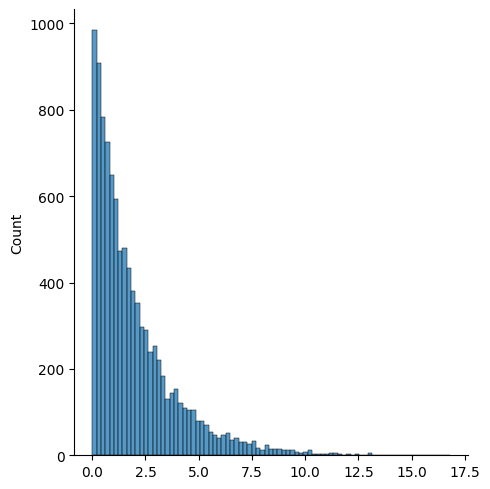

In [101]:
import seaborn as sns

sns.displot(data)

### Evaluar puntos en distribuciones

In [102]:
# Generamos puntos entre -30 y 50 con una densidad de 0.01

x = np.arange(-30, 50, 0.01)
x

array([-30.  , -29.99, -29.98, ...,  49.97,  49.98,  49.99])

In [103]:
# Evaluamos los valores de los puntos en las distintas distribuciones 

gamma = stt.gamma(6, 0, 2).pdf(x)
laplace = stt.laplace(10, 5.8).pdf(x)
normal = 3*stt.norm(10, 15).pdf(x)

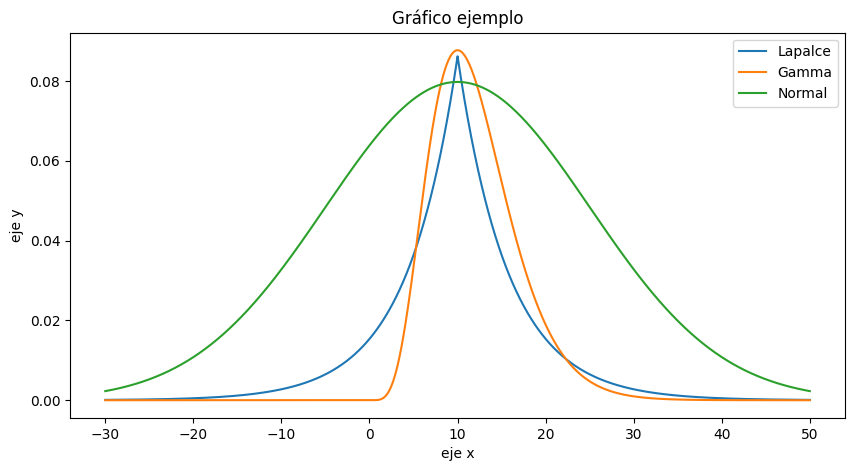

In [104]:
# Graficar los puntos 

plt.title('Gráfico ejemplo')
plt.plot(x, laplace, label='Lapalce')
plt.plot(x, gamma, label='Gamma')
plt.plot(x, normal, label='Normal')
plt.xlabel('eje x')
plt.ylabel('eje y')
plt.legend() #Para que aparezcan labels derecha arriba

plt.show()

# Otros ejemplos

### Uniforme, binomial

In [108]:
datos_uniformes = stt.uniform.rvs(size=10000)

datos_binom = stt.binom.rvs(1, 0.5, size=10000)

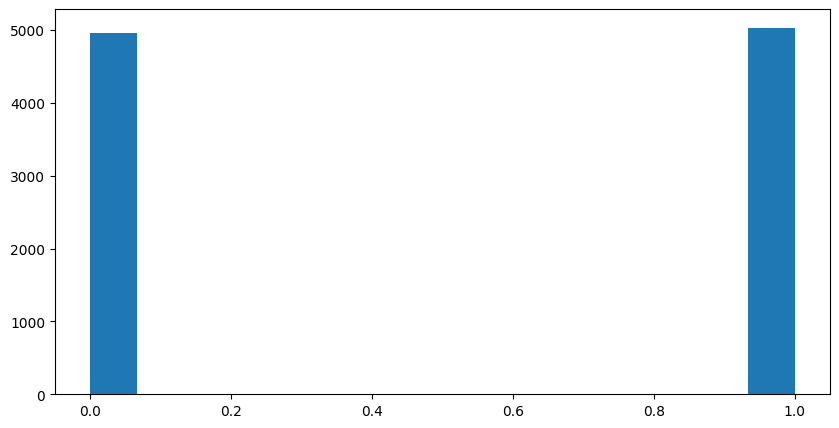

In [109]:
plt.hist(datos_binom, bins='auto')
plt.show()

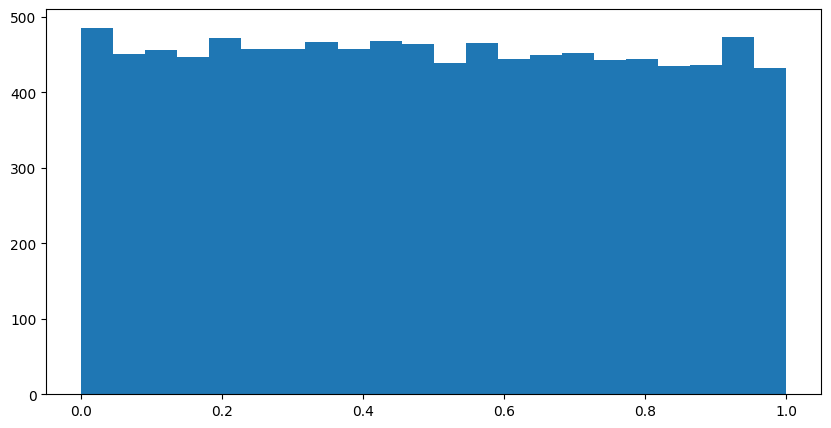

In [110]:
plt.hist(datos_uniformes, bins='auto')
plt.show()

### Normal multivariada

In [111]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import ion, figure, scatter, draw
from matplotlib.patches import Ellipse

def plot_point_cov(points, nstd=2, ax=None, **kwargs):
    """
    Plots an `nstd` sigma ellipse based on the mean and covariance of a point
    "cloud" (points, an Nx2 array).

    Parameters
    ----------
        points : An Nx2 array of the data points.
        nstd : The radius of the ellipse in numbers of standard deviations.
            Defaults to 2 standard deviations.
        ax : The axis that the ellipse will be plotted on. Defaults to the 
            current axis.
        Additional keyword arguments are pass on to the ellipse patch.

    Returns
    -------
        A matplotlib ellipse artist
    """
    pos = points.mean(axis=0)
    cov = np.cov(points, rowvar=False)
    return plot_cov_ellipse(cov, pos, nstd, ax, **kwargs)

def plot_cov_ellipse(cov, pos, nstd=2, ax=None, **kwargs):
    """
    Plots an `nstd` sigma error ellipse based on the specified covariance
    matrix (`cov`). Additional keyword arguments are passed on to the 
    ellipse patch artist.

    Parameters
    ----------
        cov : The 2x2 covariance matrix to base the ellipse on
        pos : The location of the center of the ellipse. Expects a 2-element
            sequence of [x0, y0].
        nstd : The radius of the ellipse in numbers of standard deviations.
            Defaults to 2 standard deviations.
        ax : The axis that the ellipse will be plotted on. Defaults to the 
            current axis.
        Additional keyword arguments are pass on to the ellipse patch.

    Returns
    -------
        A matplotlib ellipse artist
    """
    def eigsorted(cov):
        vals, vecs = np.linalg.eigh(cov)
        order = vals.argsort()[::-1]
        return vals[order], vecs[:,order]

    if ax is None:
        ax = plt.gca()

    vals, vecs = eigsorted(cov)
    theta = np.degrees(np.arctan2(*vecs[:,0][::-1]))

    # Width and height are "full" widths, not radius
    
    width, height = 2 * nstd * np.sqrt(vals)
    ellip = Ellipse(xy=pos, width=width, height=height, angle=theta, **kwargs)

    ax.add_artist(ellip)
    return ellip

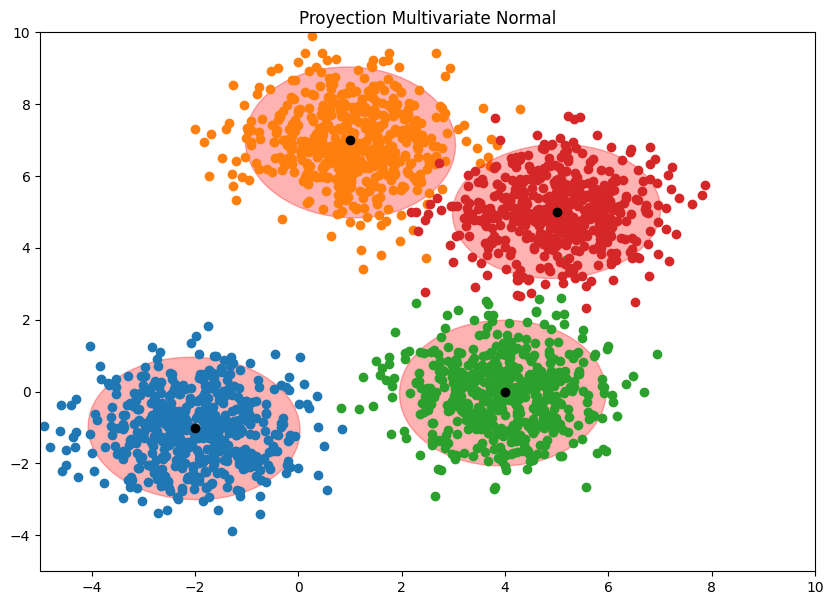

In [112]:
m = [(-2, -1), (1, 7), (4, 0), (5, 5)]
fig, ax = plt.subplots(figsize = (10, 7))

plt.xlim(-5, 10)
plt.ylim(-5, 10)

plt.title('Proyection Multivariate Normal')

for k in range(4):
    # samplear datos para visualizar cada elipse 
    points = np.random.multivariate_normal(mean=m[k], cov=[[1,0], [0,1]], size=500)

    # definir elipse
    plot_point_cov(points, nstd=2, alpha=0.3, color='r') #np.random.rand(3))
        
    plt.scatter(points[:, 0], points[:, 1])

    plt.scatter(*m[k], color='black')


# Consejos finales de eficiencia 

### Eficiencia en operaciones aritméticas 

En este curso una de las mayores dificultades será el optimizar procesos. Al trabajar con grandes cantidades de datos, los '_doble for_' y las listas por comprensión son muy ineficientes. Es por esta razón que para todas las operaciones que involucren recorrer toda la base de datos o realizar operaciones repetitivas, se deben usar `operaciones vectoriales`. Ellas están implementadas por _default_ en `numpy`. 


Por ejemplo, si se tiene una sumatoria de productos entre dos `arrays`, la lógica de intro/programación avanzada, nos dice que podríamos hacerlo con la ayuda de un `for`. 

In [113]:
lista1 = np.random.rand(3)
lista2 = np.random.rand(3)

suma = 0 
for i in range(3):
    suma += lista1[i] * lista2[i] 

print(suma)

0.25279279077975314


In [114]:
lista1

array([0.85519808, 0.44076753, 0.60179624])

Funaciona bien! No obstante, debemos recordar que estamos trabajando con 3 datos :( En el caso de tener una base de datos más grande, digamos 1.000.000 datos, **el panorama cambia**. 

In [115]:
lista1 = np.random.rand(1000000)
lista2 = np.random.rand(1000000)

In [228]:
%%timeit

suma = 0 
for i in range(1000000):
    suma += lista1[i] * lista2[i] 


185 ms ± 2.53 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


En cambio, si llevamos esta operación a una vectorizada:

In [229]:
%%timeit
np.dot(lista1, lista2)

247 µs ± 7.23 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


Es fácil darse cuenta que el **tiempo de ejecución en operaciones vectoriales** es mucho menor. Es por ello que siempre que se está armando un algoritmo es recomendable primero armarlo con funciones familiares y nativas de `python` como `for` o `while`, pero luego, cuando el programa ya funcione correctamente, ir cambiado las operaciones a otras que involucren productos cruz, punto, inversiones, transposiciones, entre otras. 

### Eficiencia en manejos de Dataframes en Pandas 

Muchas veces tendremos que sumar, multiplicar, mover o cambiar un caracter en los elementos de entre las filas de un `Dataframe` de `Pandas`. Para ello, nos veremos tentados a usar el método `iterrows`. **Mala idea**. Este método trabaja igual que un `for` built-in. Como podemos intuir, para bases pequeñas funciona bien. Pero cuando tenemos bases más apegadas a la realidad, nuestro `iterrows` podría tardar meses. Es por esto que es altamente recomendado usar los métodos que nos ofrece `pandas` para manipular los `Dataframes`. Algunos ejemplos son: 

    - DataFrame.add (Suma un float a un dataframe o a cierta parte de éste) 
    - DataFrame.mul (Multiplica por un float)
    - DataFrame.pow (Eleva el Dataframe) 
    

    